In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [33]:
#Data Exploration
df=pd.read_csv('Wholesale customers data.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [35]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [36]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [37]:
#Feature selection
x=df.drop(columns=['Channel','Region'])

In [38]:
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [39]:
x.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [40]:
#Data Preparation
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [41]:
#Building clustering models
inertia=[]
for k in range(1,11):
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

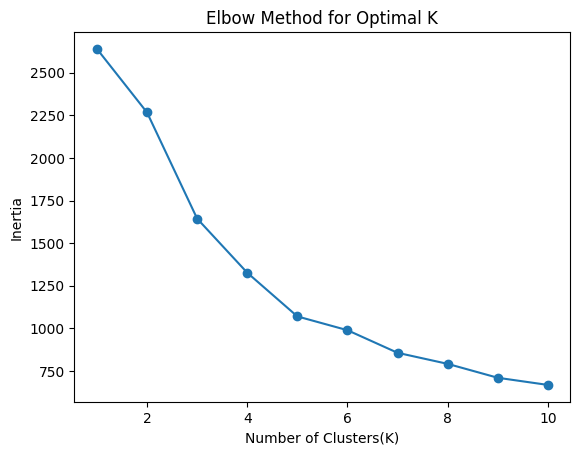

In [42]:
#Elbow Method
plt.figure()
plt.plot(range(1,11),inertia,marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()



In [43]:
#Clustering model
kmeans=KMeans(n_clusters=4,random_state=42)
df['Cluster']=kmeans.fit_predict(scaled_data)

In [44]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,3


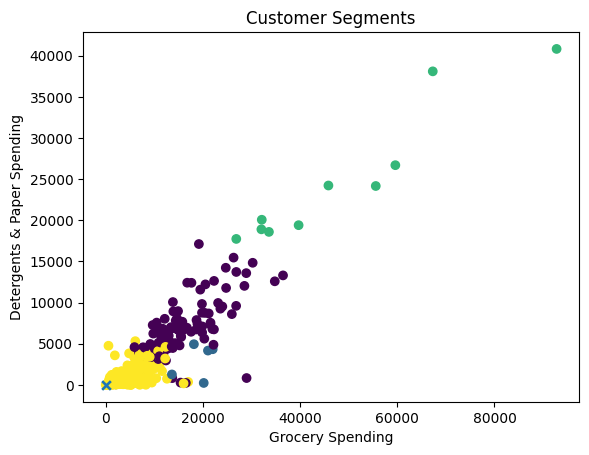

In [45]:
#Cluster Visualization
plt.figure()
plt.scatter(x['Grocery'],x['Detergents_Paper'],c=df['Cluster'])
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,4],marker='x')
plt.xlabel("Grocery Spending")
plt.ylabel("Detergents & Paper Spending")
plt.title("Customer Segments")
plt.show()


In [46]:
#Cluster Profiling
cluster_profile=df.groupby('Cluster')[x.columns].mean()
cluster_profile


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,5474.926606,10194.192661,15587.807339,1464.385321,6734.642202,1642.458716
1,40136.857143,19452.142857,15026.285714,23713.714286,2374.142857,15735.142857
2,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
3,13511.964968,3044.394904,3850.121019,3170.350318,854.808917,1122.105096


In [47]:
#Cluster Interpretation
for i in cluster_profile.index:
    print(f"\nCluster{i}")
    print(cluster_profile.loc[i])


Cluster0
Fresh                5474.926606
Milk                10194.192661
Grocery             15587.807339
Frozen               1464.385321
Detergents_Paper     6734.642202
Delicassen           1642.458716
Name: 0, dtype: float64

Cluster1
Fresh               40136.857143
Milk                19452.142857
Grocery             15026.285714
Frozen              23713.714286
Detergents_Paper     2374.142857
Delicassen          15735.142857
Name: 1, dtype: float64

Cluster2
Fresh               15964.9
Milk                34708.5
Grocery             48536.9
Frozen               3054.6
Detergents_Paper    24875.2
Delicassen           2942.8
Name: 2, dtype: float64

Cluster3
Fresh               13511.964968
Milk                 3044.394904
Grocery              3850.121019
Frozen               3170.350318
Detergents_Paper      854.808917
Delicassen           1122.105096
Name: 3, dtype: float64


In [48]:
#Strategy per Segment
strategies={
    0:"Offer discounts to increase no.of orders",
    1:"Ensure grocery stock priority and promotion",
    2:"Focus on fresh inventory and bulk pricing",
    3:"Provide personalized pricing and loyalty benefits"
}
strategies

{0: 'Offer discounts to increase no.of orders',
 1: 'Ensure grocery stock priority and promotion',
 2: 'Focus on fresh inventory and bulk pricing',
 3: 'Provide personalized pricing and loyalty benefits'}

In [49]:
#Stability check
kmeans_new=KMeans(n_clusters=4,random_state=99)
new_clusters=kmeans_new.fit_predict(scaled_data)
np.sum(df['Cluster']!=new_clusters)

np.int64(253)

In [50]:
#Limitation
print("Limitation: K-Means is sensitive to outliers and assumes spherical clusters.")


Limitation: K-Means is sensitive to outliers and assumes spherical clusters.
